# Logistic Regression

## Data Dictionary

There are multiple variables in the dataset which can be cleanly divided in 3 categories:

### Demographic information about customers

<b>customer_id</b> - Customer id

<b>vintage</b> - Vintage of the customer with the bank in number of days

<b>age</b> - Age of customer

<b>gender</b> - Gender of customer

<b>dependents</b> - Number of dependents

<b>occupation</b> - Occupation of the customer 

<b>city</b> - City of customer (anonymised)


### Customer Bank Relationship


<b>customer_nw_category</b> - Net worth of customer (3:Low 2:Medium 1:High)

<b>branch_code</b> - Branch Code for customer account

<b>days_since_last_transaction</b> - No of Days Since Last Credit in Last 1 year


### Transactional Information

<b>current_balance</b> - Balance as of today

<b>previous_month_end_balance</b> - End of Month Balance of previous month


<b>average_monthly_balance_prevQ</b> - Average monthly balances (AMB) in Previous Quarter

<b>average_monthly_balance_prevQ2</b> - Average monthly balances (AMB) in previous to previous quarter

<b>current_month_credit</b> - Total Credit Amount current month

<b>previous_month_credit</b> - Total Credit Amount previous month

<b>current_month_debit</b> - Total Debit Amount current month

<b>previous_month_debit</b> - Total Debit Amount previous month

<b>current_month_balance</b> - Average Balance of current month

<b>previous_month_balance</b> - Average Balance of previous month

<b>churn</b> - Average balance of customer falls below minimum balance in the next quarter (1/0)

##Importing Librarires

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action = 'ignore')
plt.style.use(['seaborn-bright', 'dark_background'])

## Importing dataset

In [2]:
data = pd.read_csv('churn_prediction_simple.csv')
data.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,0,0.0,0,187.0,2,755,224.0,1458.71,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,6,2531,42,0,2.0,0,1494.0,3,388,58.0,927.72,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1
2,7,263,42,1,0.0,0,1096.0,2,1666,60.0,15202.20,16059.34,15211.29,13798.82,0.36,0.36,857.50,286.07,15719.44,15349.75,0
3,8,5922,72,0,0.0,1,1020.0,1,1,98.0,7006.93,7714.19,7859.74,11232.37,0.64,0.64,1299.64,439.26,7076.06,7755.98,0
4,9,1145,46,0,0.0,0,623.0,2,317,172.0,10096.58,8519.53,6511.82,16314.17,0.27,0.27,443.13,5688.44,8563.84,5317.04,0


In [3]:
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22067 entries, 0 to 22066
Data columns (total 21 columns):
customer_id                       22067 non-null int64
vintage                           22067 non-null int64
age                               22067 non-null int64
gender                            22067 non-null int64
dependents                        22067 non-null float64
occupation                        22067 non-null int64
city                              22067 non-null float64
customer_nw_category              22067 non-null int64
branch_code                       22067 non-null int64
days_since_last_transaction       22067 non-null float64
current_balance                   22067 non-null float64
previous_month_end_balance        22067 non-null float64
average_monthly_balance_prevQ     22067 non-null float64
average_monthly_balance_prevQ2    22067 non-null float64
current_month_credit              22067 non-null float64
previous_month_credit             22067 non-null f

In [4]:
# checking the dataset distribution
data['churn'].value_counts()/len(data)

0    0.806317
1    0.193683
Name: churn, dtype: float64

In [0]:
#separating dependent and independent varibales
X = data.drop(columns = ['churn', 'customer_id'])
Y = data['churn']

In [0]:
#Scaling the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

In [7]:
#splitting the dataset
from sklearn.model_selection import train_test_split as tts
x_train, x_test, y_train, y_test = tts(scaled_X, Y, train_size = 0.80, stratify = Y)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((17653, 19), (4414, 19), (17653,), (4414,))

## Model Building, predictions and odds ratio

In [0]:
from sklearn.linear_model import LogisticRegression as LR
classifier = LR(class_weight = 'balanced')

In [0]:
classifier.fit(x_train, y_train)
predicted_values = classifier.predict(x_test)              # Predicting class
predicted_probabilities = classifier.predict_proba(x_test) # Predicting probabilities

In [22]:
predicted_values

array([0, 0, 0, ..., 0, 0, 0])

In [23]:
predicted_probabilities, predicted_probabilities.shape

(array([[0.59307203, 0.40692797],
        [0.72514176, 0.27485824],
        [0.52395962, 0.47604038],
        ...,
        [0.61322882, 0.38677118],
        [0.61012084, 0.38987916],
        [0.61510179, 0.38489821]]), (4414, 2))

In [24]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(y_test, predicted_values)
cf

array([[2655,  904],
       [ 312,  543]])

##Evaluation Metrics

In [26]:
#Accuracy
classifier.score(x_test, y_test)

0.7245129134571817

In [27]:
#calculating the precision score
from sklearn.metrics import precision_score
Precision = precision_score(y_test, predicted_values)
Precision

0.3752591568762958

In [28]:
#calculating recall score
from sklearn.metrics import recall_score
Recall = recall_score(y_test, predicted_values)
Recall

0.6350877192982456

In [29]:
# manually calculating the f1 score
f1 = 2/((1/Precision)+(1/Recall))
f1

0.47176368375325806

In [30]:
#calculating the f1-score
from sklearn.metrics import f1_score
F1 = f1_score(y_test, predicted_values)
F1

0.4717636837532581

In [0]:
# calculating precision, recall, f1-score and support at once.
from sklearn.metrics import precision_recall_fscore_support as PRF_summary
precision, recall, f1, support = PRF_summary(y_test, predicted_values)

In [32]:
precision

array([0.89484328, 0.37525916])

In [33]:
recall

array([0.74599607, 0.63508772])

In [34]:
f1

array([0.8136684 , 0.47176368])

In [35]:
from sklearn.metrics import classification_report
k = classification_report(y_test, predicted_values)
print(k)

              precision    recall  f1-score   support

           0       0.89      0.75      0.81      3559
           1       0.38      0.64      0.47       855

    accuracy                           0.72      4414
   macro avg       0.64      0.69      0.64      4414
weighted avg       0.79      0.72      0.75      4414



## Precision-Recall Curve

In [36]:
# gathering Precision/recall scores for different thresholds
from sklearn.metrics import precision_recall_curve
precision_points, recall_points, threshold_points = precision_recall_curve(y_test, predicted_probabilities[:,1])
precision_points.shape, recall_points.shape, threshold_points.shape

((4411,), (4411,), (4410,))

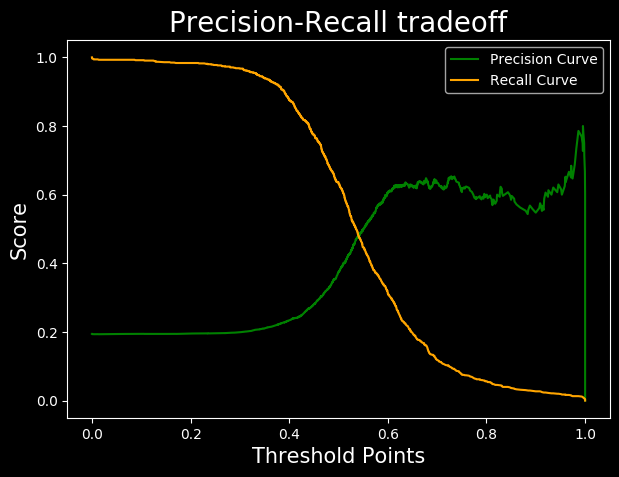

In [39]:
plt.figure(figsize = (7,5), dpi = 100)
plt.plot( threshold_points, precision_points[:-1], color = 'green', label = 'Precision Curve')
plt.plot( threshold_points, recall_points[:-1], color = 'orange', label = 'Recall Curve')
plt.xlabel('Threshold Points', fontsize = 15)
plt.ylabel('Score', fontsize = 15)
plt.title('Precision-Recall tradeoff', fontsize = 20)
plt.legend()

## AUC-ROC Curve

In [0]:
from sklearn.metrics import roc_curve , roc_auc_score
fpr, tpr, threshold = roc_curve(y_test, predicted_probabilities[:,1])

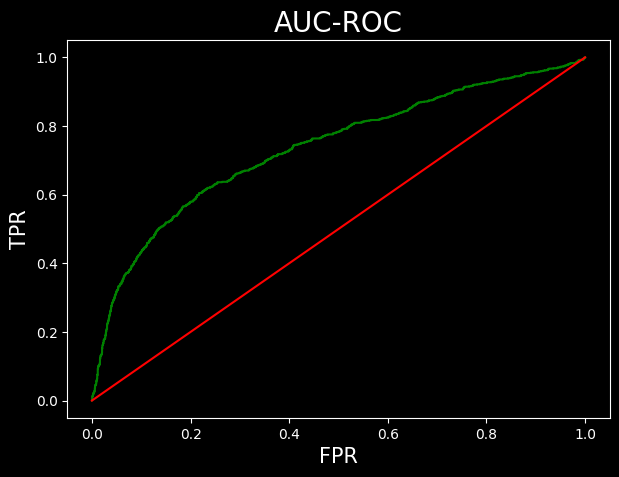

0.7355364622101287

In [42]:
plt.figure(figsize = (7,5), dpi = 100)
plt.plot( fpr, tpr, color = 'green')
plt.plot( [0,1], [0,1], label = 'baseline', color = 'red')
plt.xlabel('FPR', fontsize = 15)
plt.ylabel('TPR', fontsize = 15)
plt.title('AUC-ROC', fontsize = 20)
plt.show()
roc_auc_score(y_test, predicted_probabilities[:,1])

## Coefficient Plot

In [43]:
# arranging the data
c = classifier.coef_.reshape(-1)
x = X.columns

coeff_plot = pd.DataFrame( {
                            'coefficients': c,
                            'variable' : x
                            })

# sorting the values
coeff_plot = coeff_plot.sort_values(by = 'coefficients')
coeff_plot.head()

,coefficients,variable
9,-2.300100,current_balance
13,-0.603295,current_month_credit
0,-0.175263,vintage
10,-0.169757,previous_month_end_balance
8,-0.147729,days_since_last_transaction


Text(0.5, 1.0, 'Coefficient plot')

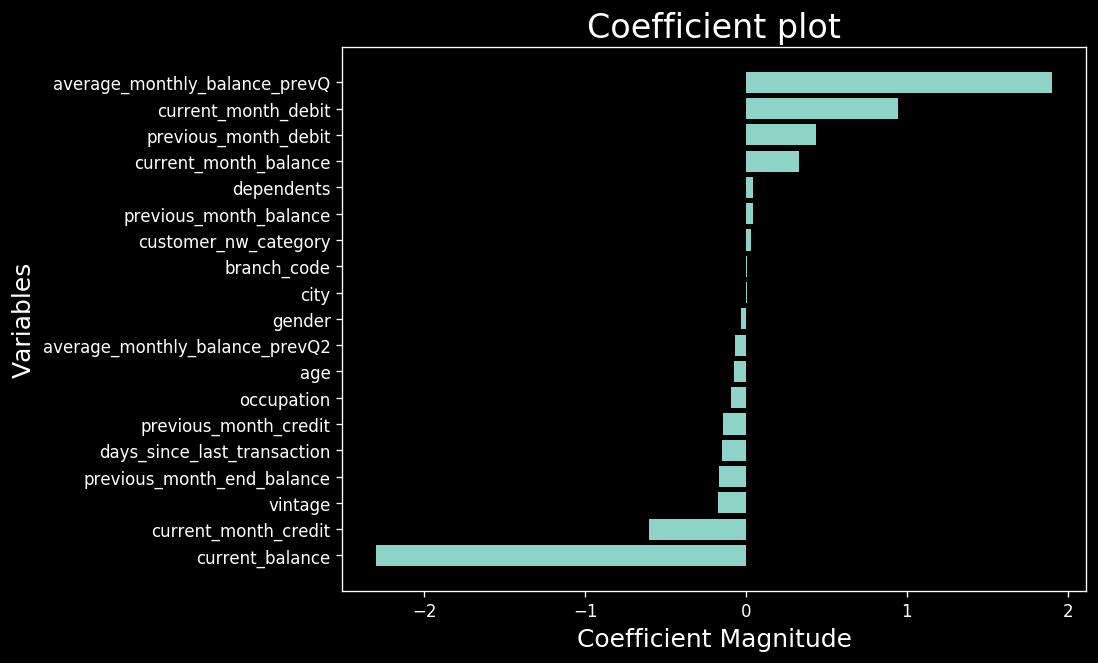

In [44]:
plt.figure(figsize=(8, 6), dpi=120)
plt.barh( coeff_plot['variable'] , coeff_plot['coefficients'] )
plt.xlabel( "Coefficient Magnitude", fontsize = 15)
plt.ylabel('Variables', fontsize = 15)
plt.title('Coefficient plot', fontsize = 20)